# Práctica: Estadística descriptiva y comparación de grupos

In [ ]:
# Instala dependencias
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Evaluaciones/HemoglobinaEmbarazoyEdad.sav
!pip install pingouin
!pip install pyreadstat

En las respuestas deben indicar:

- Hipótesis de trabajo e hipótesis estadísticas, de manera correspondiente.
- Resultados de prueba de normalidad para las distribuciones de las variables de estudio.
- Indicadores estadísticos utilizados (SW, M, Mdn, DE, t, U, F, r) el valor p
correspondiente, y la magnitud según criterios de Cohen, de ser pertinente.
- Redacción de las conclusiones.

>Nota: reportar la normalidad de las distribuciones en base a la prueba Shapiro-Wilk. Para
efectos de este reporte, NO consideren asimetría y curtosis para decidir la prueba estadística a
utilizar

En esta práctica contamos con una base de datos que muestra los niveles de hemoglobina en la sangre de mujeres. Además, se brinda información sobre si las mujeres están embarazadas o no, así como su edad. A partir de la información presente en esta base de datos, responde:
> La variable `Embarazada` codifica como 1 si las encuestadas estaban embarazadas y como 0 en caso contrario.

In [2]:
import pandas as pd

df = pd.read_spss("HemoglobinaEmbarazoyEdad.sav")
df.drop(columns=["HHID"], inplace=True)
mapping = {"Sí": 1, "No o no sabe": 0}
df.replace({"HA54": mapping}, inplace=True)
df.rename(columns={"HA54": "Embarazada"}, inplace=True)
df.dropna(inplace=True)
df = df.iloc[:1000, :]
df

,Embarazada,Nivel_de_hemoglobina,Edad
0,0.0,13.8,39.0
1,1.0,13.6,22.0
2,0.0,13.1,19.0
3,0.0,10.4,33.0
4,0.0,13.7,33.0
...,...,...,...
1048,0.0,12.5,27.0
1049,0.0,15.5,20.0
1050,0.0,13.9,41.0
1051,0.0,12.7,15.0


> Para obtener esta base de datos en SPSS, corresponde eliminar todos los casos con valores nulos/incompletos y luego seleccionar las primeras 1000 filas.

## Pregunta 1

Describe la muestra de acuerdo con las variables sociodemográficas reportadas (Edad y Embarazo) y señala el tipo de variable y los estadísticos descriptivos que mejor brinden información sobre ellas.

La edad es una variable continua y numérica por lo que es más adecuado considerar la
media, es decir el promedio de las edades de las participantes. Para dispersión se
consideraría la desviación estándar y los valores mínimo y máximo (rango).

El estado de embarazo es una variable cualitativa y nominal por lo que resulta adecuado reportar las
frecuencias o porcentajes de cada valor, embarazada o no embarazada.

In [3]:
df["Edad"].describe()

count    1000.000000
mean       30.319000
std         9.278541
min        15.000000
25%        23.000000
50%        30.000000
75%        38.000000
max        49.000000
Name: Edad, dtype: float64

In [4]:
pd.crosstab(df["Embarazada"], columns="Frecuencia (%)", normalize=True)

col_0,Frecuencia (%)
Embarazada,
0.0,0.959
1.0,0.041


Descripción: 
La muestra estuvo compuesta por 1000 mujeres, 95.9% no embarazadas y 4.1% embarazadas, con edades entre 15 a 49 años (M=30.31, DE=9.27).

## Pregunta 2

Las evidencias indican que existiría una diferencia en el nivel de hemoglobina según el estado de embarazo de las participantes, con las mujeres embarazadas puntuando más bajo que las no embarazadas. Plantea y lleva a cabo los análisis estadísticos correspondientes y describe lo encontrado. 

In [8]:
df.groupby("Embarazada").describe()

Nivel_de_hemoglobina                                              \
                          count       mean       std  min   25%   50%   75%   
Embarazada                                                                    
0.0                       959.0  13.169343  1.201269  6.9  12.4  13.2  13.9   
1.0                        41.0  11.926829  1.090189  9.4  11.3  11.8  12.9   

                   Edad                                                     
             max  count       mean       std   min   25%   50%   75%   max  
Embarazada                                                                  
0.0         16.2  959.0  30.453597  9.357752  15.0  23.0  30.0  38.0  49.0  
1.0         13.8   41.0  27.170732  6.503470  15.0  22.0  26.0  32.0  40.0

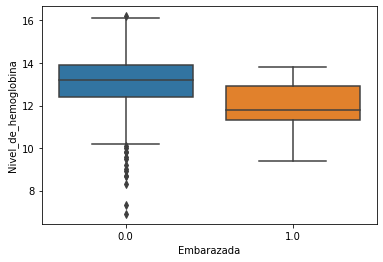

In [59]:
sns.boxplot(x="Embarazada", y="Nivel_de_hemoglobina", data=df)
plt.show()

HT: Hay una diferencia en el nivel de hemoglobina en la muestra, con las mujeres embarazadas puntuando más bajos que las mujeres no embarazadas.

- $H_{0}$: $\mu_{embarazadas} = \mu_{no \ embarazadas}$
- $H_{1}$: $\mu_{embarazadas} < \mu_{no \ embarazadas}$

In [60]:
pg.normality(
    data=df, dv="Nivel_de_hemoglobina", group="Embarazada", method="shapiro"
)

,W,pval,normal
0.0,0.976965,3.480638e-11,False
1.0,0.968391,3.052200e-01,True


La distribución del nivel de hemoglobina en mujeres embarazadas fue no normal (SW=.976, p <.001), mientras que la de mujeres no embarazadas fue normal (SW=.968, p=.305). Por lo tanto, se usará el análisis no paramétrico de contraste de dos muestras independientes U de Mann-Whitney.

In [61]:
embarazadas = df.query("Embarazada == 1")["Nivel_de_hemoglobina"]
no_embarazadas = df.query("Embarazada == 0")["Nivel_de_hemoglobina"]

pg.mwu(embarazadas, no_embarazadas, alternative="less")

,U-val,alternative,p-val,RBC,CLES
MWU,8392.0,less,2.430275e-10,0.573133,0.786566


El resultado del análisis de comparación fue significativo, U(1000)=8392, p<.001 (unilateral), con las mujeres embarazadas puntuando más bajo en el nivel de hemoglobina (Me=11.8, IQR=1.6) que las mujeres no embarazadas (Me=13.2, IQR=1.5), con un tamaño del efecto mediano, r =.573.

En conclusión, los resultados muestran que el nivel de hemoglobina varía según la condición de embarazo de las participantes, con las mujeres embarazadas puntuando más bajo que las no embarazadas. Así, la hipótesis de trabajo se cumple en el estudio.